# # Installation: 

 pip install QNPy

# REQUIREMENTS

This package contain a requirements.txt file with all the requirements that need to be setisfied (mainly other packages) before you can use it as a single package. To install all requirements at once, you will need to:

1. in command line navigate to the directory where you downloaded your package (where the requirements.txt file is)
2. once you are there type:
pip install -r requirements.txt

You are redy to use QNPy package now

# Preprocess

Before running this script, you must create the following folders in the directory where your Python notebook is located:
1. ./Padded_lc/ -- folder for saving the backward padded light curves
1. ./preproc/ --  folder for saving the transformed data

In [1]:
import QNPy #Importing the package
import pandas as pd

from QNPy import Preprocess as pr #Importing Preprocess module from the package
from QNPy.Preprocess import transform #importing the function transform for transformation the data
from QNPy.Preprocess import * #importing all external packages from Preprocess

In [2]:
#Importing the data. This can be done in any desired manner, but the data must contain:
#mjd - MJD or time, mag-magnitude and magerr-magnitude error. 
# In this example we used pandas python package for importing the .csv data, but numpy can be used if the data is 
#in .txt file
path = './light_curves' #path to data
csv_files = glob.glob(path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
data = pd.concat(df_list, ignore_index=True)

In [3]:
# Display the data
display(data)

,mjd,mag,magerr
0,51875.25,20.462597,0.052730
1,52171.48,20.034254,0.055963
2,52224.37,20.066654,0.045022
3,52225.33,20.111341,0.045820
4,52234.32,20.099497,0.054835
...,...,...,...
1192,54417.36,19.496582,0.033113
1193,54418.36,19.466612,0.033037
1194,54422.36,19.452637,0.044635
1195,54424.30,19.583004,0.048837


In [12]:
# Padding the light curves
# We added the function for backward padding the curves with last observed value
# The length for padding should remain 100 or above 

padding= pr.backward_pad_curves('./light_curves', './Padded_lc', desired_observations=150)

Created new file: ./Padded_lc\1.csv
Created new file: ./Padded_lc\10.csv
Created new file: ./Padded_lc\2.csv
Created new file: ./Padded_lc\3.csv
Created new file: ./Padded_lc\4.csv
Created new file: ./Padded_lc\5.csv
Created new file: ./Padded_lc\6.csv
Created new file: ./Padded_lc\7.csv
Created new file: ./Padded_lc\8.csv
Created new file: ./Padded_lc\9.csv


In [13]:
padded_example_path = r'./Padded_lc/3.csv'
padded_df = pd.read_csv(padded_example_path)
padded_df.tail(10)

,mjd,mag,magerr
141,54439.18,21.149933,0.339507
142,54439.38,21.149933,0.339507
143,54439.58,21.149933,0.339507
144,54439.78,21.149933,0.339507
145,54439.98,21.149933,0.339507
146,54440.18,21.149933,0.339507
147,54440.38,21.149933,0.339507
148,54440.58,21.149933,0.339507
149,54440.78,21.149933,0.339507
150,54440.98,21.149933,0.339507


In [14]:
#Path to Padded Data
DATA_SRC = "./Padded_lc" 
#path to folder to save preproc data (transformed data) + errors
DATA_DST = "./preproc" 

In [15]:
#listing the data that are going to be transformed. 
#In case that your original data is in one table, this is not needed
files = os.listdir(DATA_SRC) 

In [16]:
#running the transformation function
number_of_points, trcoeff = pr.transform_and_save(files, DATA_SRC, DATA_DST, transform)

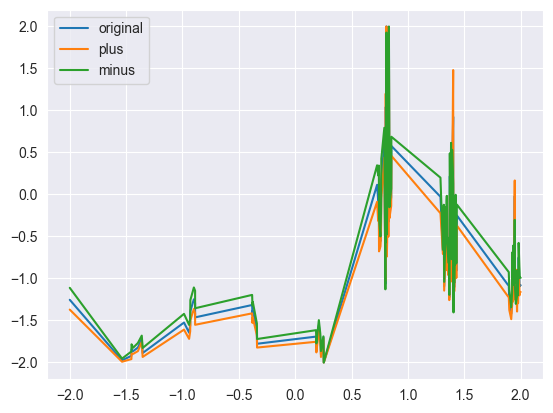

In [17]:
original = pd.read_csv(r'./preproc/1_original.csv')
plus = pd.read_csv(r'./preproc/1_plus.csv')
minus = pd.read_csv(r'./preproc/1_minus.csv')

plt.plot(original.time, original.cont, label= "original")
plt.plot(plus.time, plus.cont, label= "plus")
plt.plot(minus.time, minus.cont, label= "minus")
plt.legend()
plt.show()